In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Función de probabilidad modificada para tres fermiones, considerando que uno está en una posición fija
def P_fermions_three(n1, n2, n3, x1, x2, x3_fixed):
    # Términos individuales de las funciones de onda
    term1 = np.sin(n1 * x1) * np.sin(n2 * x2) * np.sin(n3 * x3_fixed)
    term2 = np.sin(n1 * x2) * np.sin(n2 * x1) * np.sin(n3 * x3_fixed)
    term3 = np.sin(n1 * x1) * np.sin(n2 * x3_fixed) * np.sin(n3 * x2)
    term4 = np.sin(n1 * x3_fixed) * np.sin(n2 * x1) * np.sin(n3 * x2)
    term5 = np.sin(n1 * x2) * np.sin(n2 * x3_fixed) * np.sin(n3 * x1)
    term6 = np.sin(n1 * x3_fixed) * np.sin(n2 * x2) * np.sin(n3 * x1)

    # Determinante de Slater para tres fermiones
    slater_det = term1 - term2 - term3 + term4 + term5 - term6

    # Densidad de probabilidad
    return slater_det**2

def P_bosons_three(n1, n2, n3, x1, x2, x3_fixed):
    # Términos individuales de las funciones de onda
    term1 = np.sin(n1 * x1) * np.sin(n2 * x2) * np.sin(n3 * x3_fixed)
    term2 = np.sin(n1 * x2) * np.sin(n2 * x1) * np.sin(n3 * x3_fixed)
    term3 = np.sin(n1 * x1) * np.sin(n2 * x3_fixed) * np.sin(n3 * x2)
    term4 = np.sin(n1 * x3_fixed) * np.sin(n2 * x1) * np.sin(n3 * x2)
    term5 = np.sin(n1 * x2) * np.sin(n2 * x3_fixed) * np.sin(n3 * x1)
    term6 = np.sin(n1 * x3_fixed) * np.sin(n2 * x2) * np.sin(n3 * x1)

    # Determinante de Slater para tres fermiones
    slater_det = term1 + term2 + term3 + term4 + term5 + term6

    # Densidad de probabilidad
    return slater_det**2

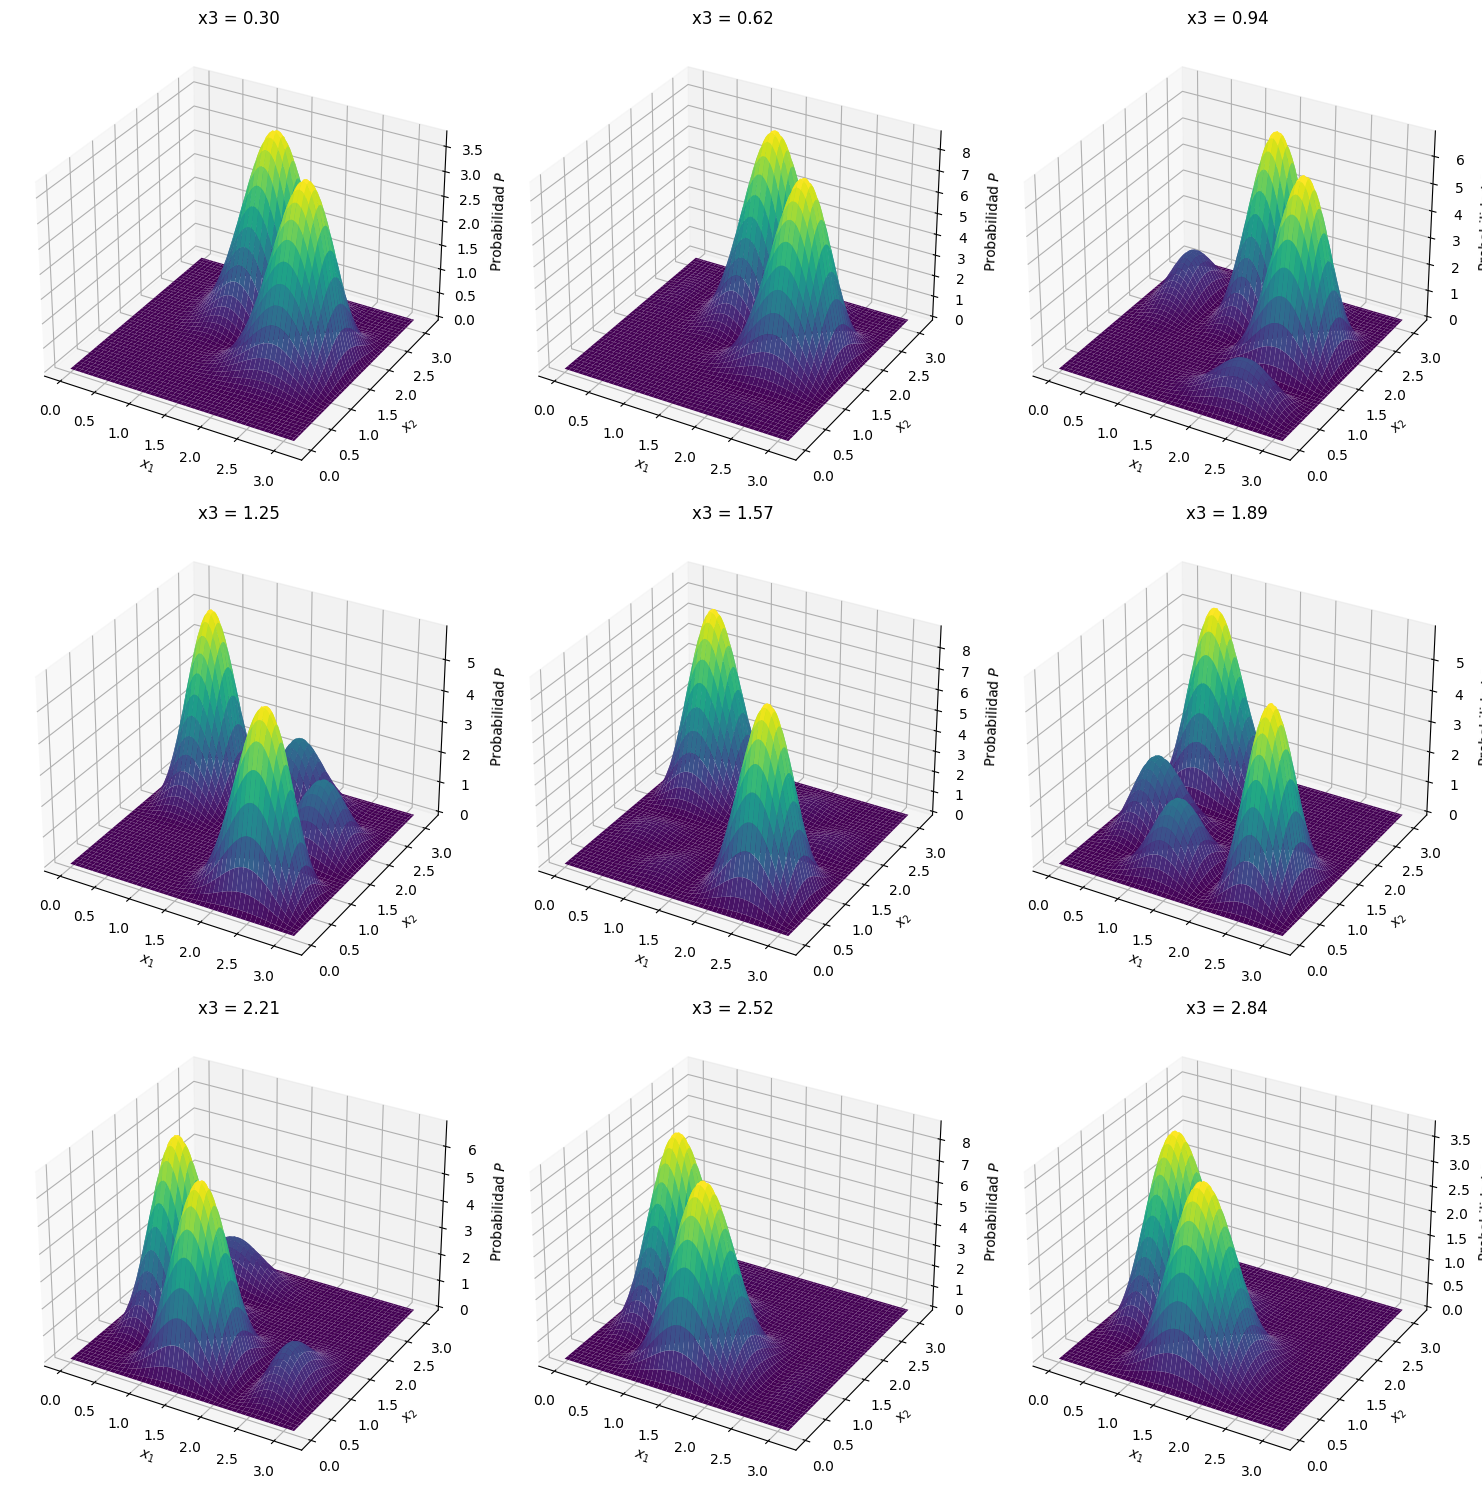

In [ ]:
#Fermiones sin temperatura

# Vamos a crear 9 subplots, cada uno con una posición diferente para la tercera partícula en el rango de 0 a pi.
# Asumimos que la tercera partícula está en el segundo estado excitado, n = 3
n3_second_excited = 3
x3_fixed = np.pi / 2  # posición fija para la tercera partícula
n1_ground_state, n2_first_excited = 1,2
xmin = 0
xmax = np.pi
muestreo = 100
x = np.linspace(xmin, xmax, muestreo)
x1, x2 = np.meshgrid(x, x)
# Creando la figura con subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15), subplot_kw={'projection': '3d'})
positions_x3 = np.linspace(0.3, np.pi-0.3, 9)  # Nueve posiciones para la tercera partícula

# Iteramos a través de las posiciones y de los ejes de los subplots
for ax, x3 in zip(axs.ravel(), positions_x3):
    # Calculamos la densidad de probabilidad para la posición actual de x3
    P_fermion_three_values = P_fermions_three(n1_ground_state, n2_first_excited, n3_second_excited, x1, x2, x3)

    # Superficie del gráfico
    surf = ax.plot_surface(x1, x2, P_fermion_three_values, cmap='viridis', edgecolor='none')

    # Etiquetas
    ax.set_title(f'x3 = {x3:.2f}')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('Probabilidad $P$')
    ax.set_zlim(0, np.max(P_fermion_three_values))

# Ajustar el layout para evitar la superposición de los títulos
plt.tight_layout()

# Mostrar la figura
plt.show()


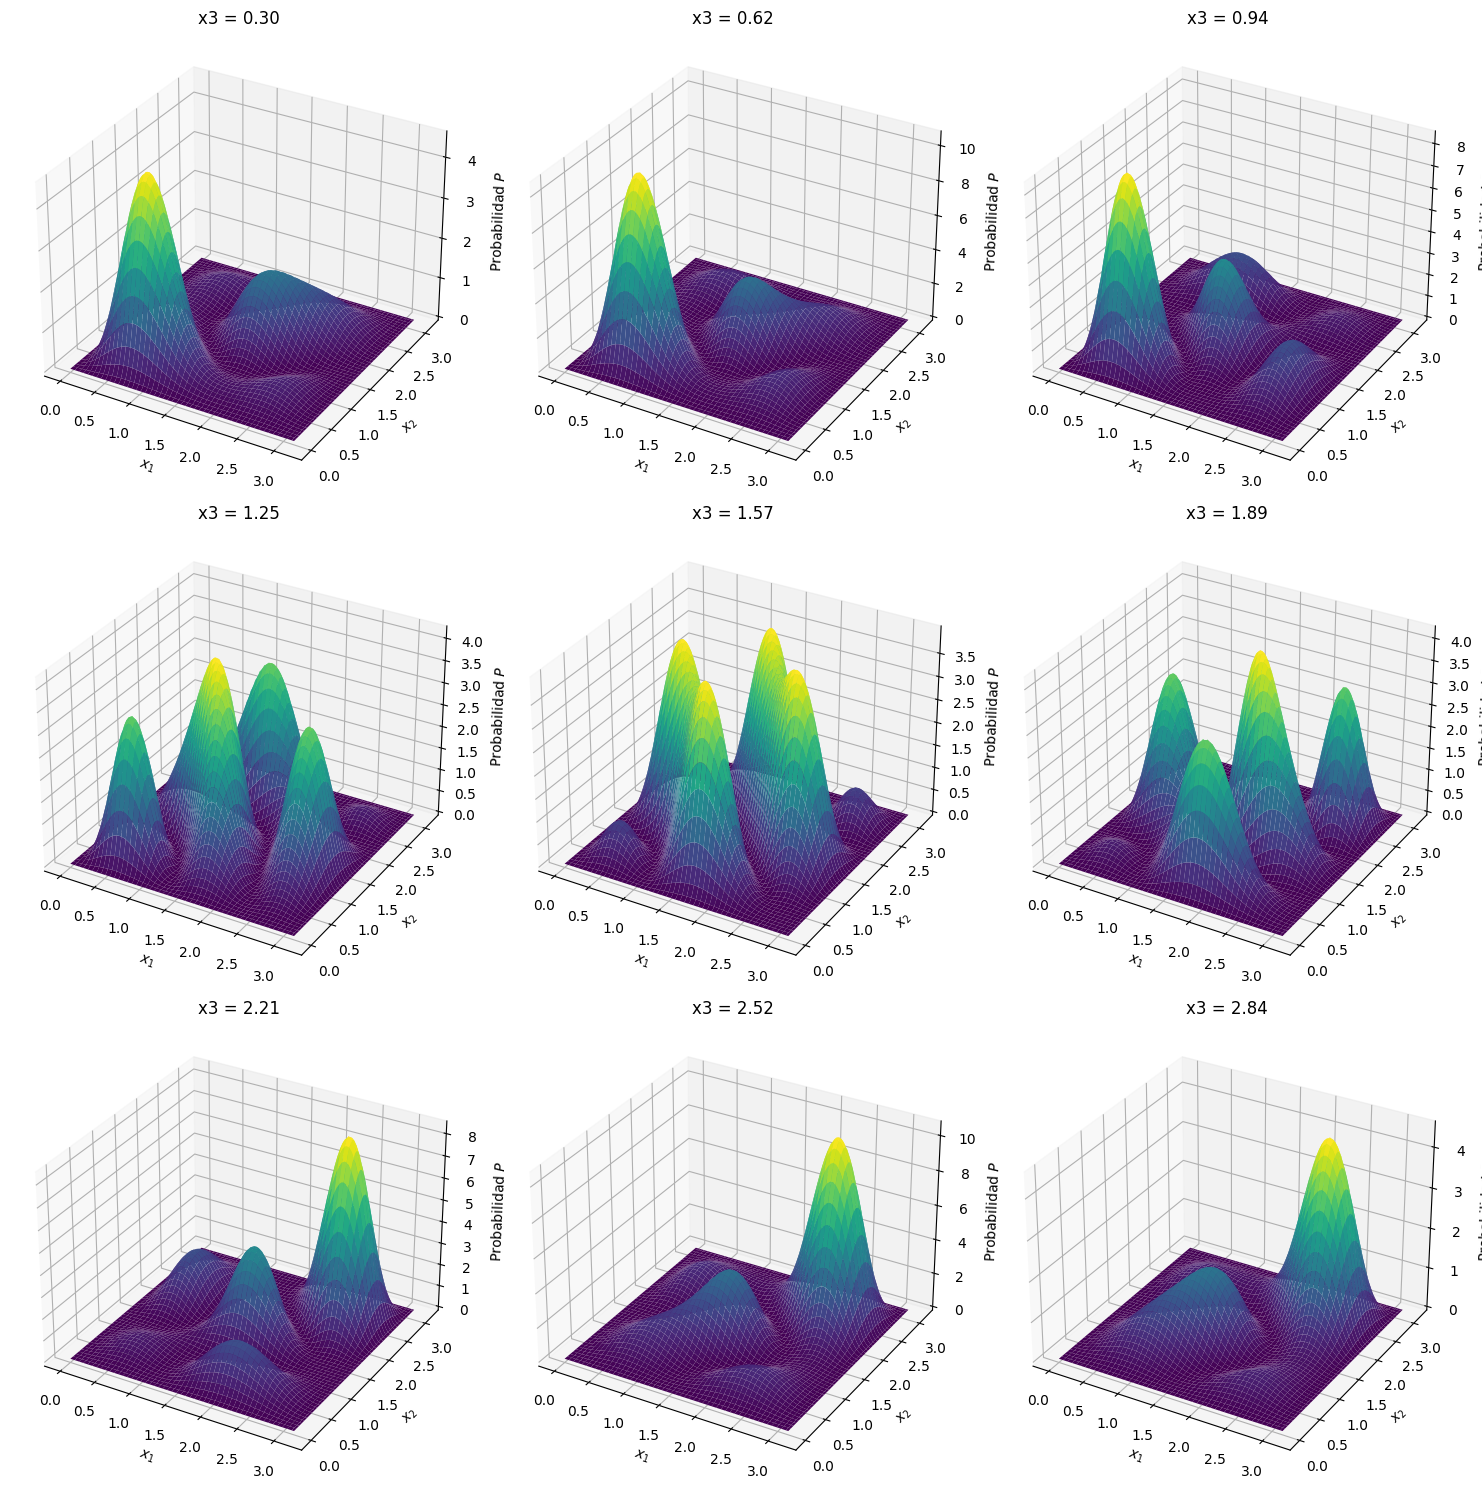

In [ ]:
#Bosones sin Temperatura

# Creando la figura con subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15), subplot_kw={'projection': '3d'})
positions_x3 = np.linspace(0.3, np.pi-0.3, 9)  # Nueve posiciones para la tercera partícula

# Iteramos a través de las posiciones y de los ejes de los subplots
for ax, x3 in zip(axs.ravel(), positions_x3):
    # Calculamos la densidad de probabilidad para la posición actual de x3
    P_bosons_three_values = P_bosons_three(n1_ground_state, n2_first_excited, n3_second_excited, x1, x2, x3)

    # Superficie del gráfico
    surf = ax.plot_surface(x1, x2, P_bosons_three_values, cmap='viridis', edgecolor='none')

    # Etiquetas
    ax.set_title(f'x3 = {x3:.2f}')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('Probabilidad $P$')
    ax.set_zlim(0, np.max(P_bosons_three_values))

# Ajustar el layout para evitar la superposición de los títulos
plt.tight_layout()

# Mostrar la figura
plt.show()

In [ ]:
# Optimized function modified to use the given P_fermions_three function for the third particle
def Pth_fermiones3_optimizado(nmax, xmin, xmax, muestreo, t, x3_fixed):
    # New function to calculate the probability for three fermions
    def P_fermions_three(n1, n2, n3, x1, x2, x3_fixed):
        term1 = np.sin(n1 * x1) * np.sin(n2 * x2) * np.sin(n3 * x3_fixed)
        term2 = np.sin(n1 * x2) * np.sin(n2 * x1) * np.sin(n3 * x3_fixed)
        term3 = np.sin(n1 * x1) * np.sin(n2 * x3_fixed) * np.sin(n3 * x2)
        term4 = np.sin(n1 * x3_fixed) * np.sin(n2 * x1) * np.sin(n3 * x2)
        term5 = np.sin(n1 * x2) * np.sin(n2 * x3_fixed) * np.sin(n3 * x1)
        term6 = np.sin(n1 * x3_fixed) * np.sin(n2 * x2) * np.sin(n3 * x1)

        slater_det = term1 - term2 - term3 + term4 + term5 - term6

        return (2 / np.pi**3) * slater_det**2

    x = np.linspace(xmin, xmax, muestreo)
    x1, x2 = np.meshgrid(x, x)
    Pth = np.zeros_like(x1)

    # Pre-calculate exponential values for the energy levels
    exp_vals = np.exp(-np.arange(1, nmax+1)**2/t)

    # Calculate the density matrix using the Slater determinant for three fermions
    for n1 in range(1, nmax-1):
        for n2 in range(n1 + 1, nmax):
            for n3 in range(n2 + 1, nmax+1):
                Pth += P_fermions_three(n1, n2, n3, x1, x2, x3_fixed) * exp_vals[n1 - 1] * exp_vals[n2 - 1] * exp_vals[n3 - 1]

    # Normalize the probability matrix
    normalization_factor = np.sum(exp_vals[:nmax]**2)**1.5  # Since we have three particles, raise to the power of 1.5
    Pth /= normalization_factor

    # Plot with matplotlib
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # ax.plot_surface(x1, x2, Pth, cmap='viridis')
    # plt.title('Densidad de probabilidad de tres fermiones en contacto con reservorio térmico')
    # plt.show()

    return Pth

# Optimized function modified to use the given P_fermions_three function for the third particle
def Pth_bosons_optimizado(nmax, xmin, xmax, muestreo, t, x3_fixed):
    # New function to calculate the probability for three fermions
    def P_bosons_three(n1, n2, n3, x1, x2, x3_fixed):
        term1 = np.sin(n1 * x1) * np.sin(n2 * x2) * np.sin(n3 * x3_fixed)
        term2 = np.sin(n1 * x2) * np.sin(n2 * x1) * np.sin(n3 * x3_fixed)
        term3 = np.sin(n1 * x1) * np.sin(n2 * x3_fixed) * np.sin(n3 * x2)
        term4 = np.sin(n1 * x3_fixed) * np.sin(n2 * x1) * np.sin(n3 * x2)
        term5 = np.sin(n1 * x2) * np.sin(n2 * x3_fixed) * np.sin(n3 * x1)
        term6 = np.sin(n1 * x3_fixed) * np.sin(n2 * x2) * np.sin(n3 * x1)

        slater_det = term1 + term2 + term3 + term4 + term5 + term6

        return slater_det**2

    x = np.linspace(xmin, xmax, muestreo)
    x1, x2 = np.meshgrid(x, x)
    Pth = np.zeros_like(x1)

    # Pre-calculate exponential values for the energy levels
    exp_vals = np.exp(-np.arange(1, nmax+1)**2/t)

    # Calculate the density matrix using the Slater determinant for three fermions
    for n1 in range(1, nmax - 1):
        for n2 in range(n1 + 1, nmax):
            for n3 in range(n2 + 1, nmax):
                Pth += P_bosons_three(n1, n2, n3, x1, x2, x3_fixed) * exp_vals[n1 - 1] * exp_vals[n2 - 1] * exp_vals[n3 - 1]

    # Normalize the probability matrix
    normalization_factor = np.sum(exp_vals[:nmax]**2)**1.5  # Since we have three particles, raise to the power of 1.5
    Pth /= normalization_factor

    # Plot with matplotlib
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # ax.plot_surface(x1, x2, Pth, cmap='viridis')
    # plt.title('Densidad de probabilidad de tres fermiones en contacto con reservorio térmico')
    # plt.show()

    return Pth

# Parameters for the example
nmax = 25  # Using a smaller nmax for faster execution
xmin = 0
xmax = np.pi
muestreo = 100
t = 10
x = np.linspace(xmin, xmax, muestreo)
x1, x2 = np.meshgrid(x, x)
x3_fixed = np.linspace(0.3, np.pi-0.3, 9)  # Nueve posiciones para la tercera partícula
# Call the function with the third particle fixed at np.pi/2

# Pth = [Pth_fermiones3_optimizado(nmax, xmin, xmax, muestreo, t, i) for i in x3_fixed]



# Pth


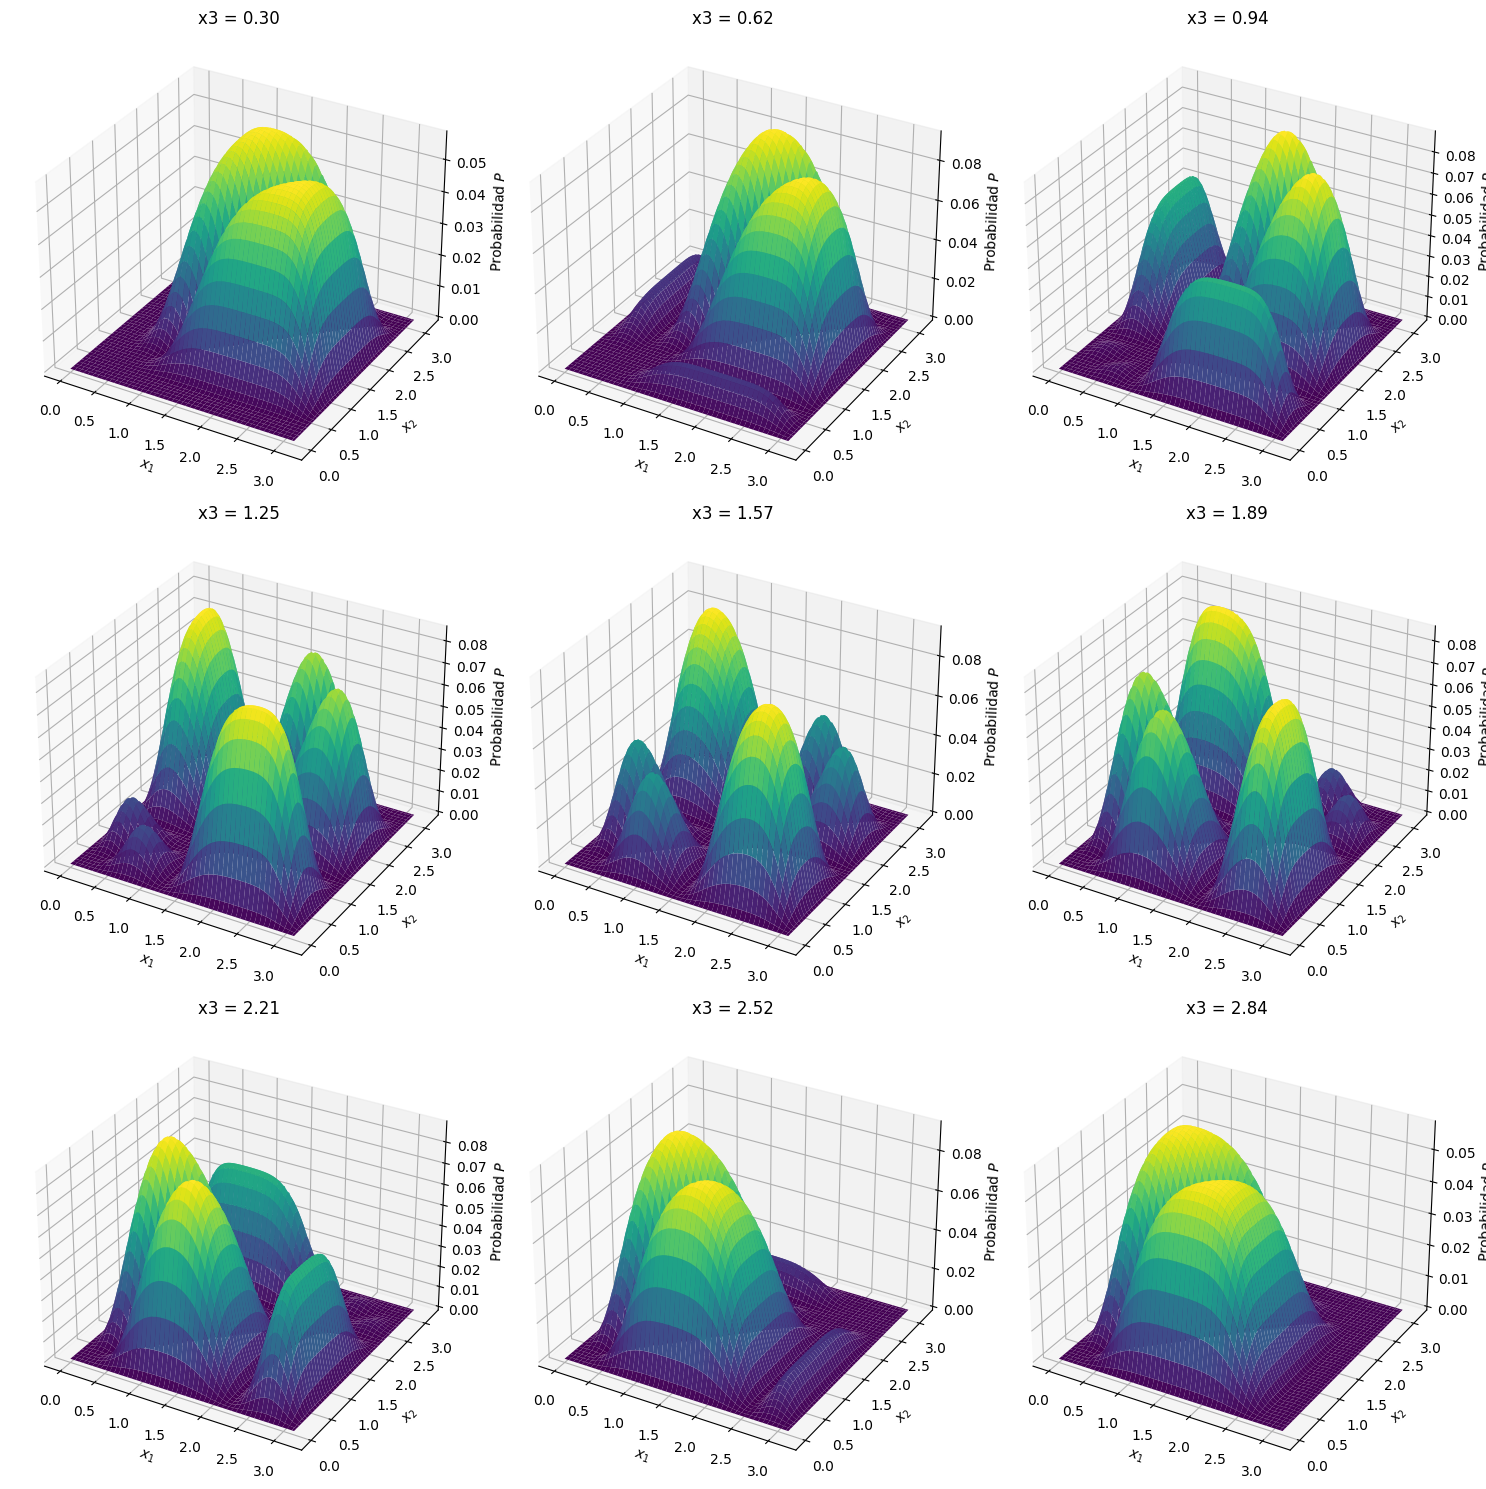

In [ ]:
#Fermiones con temperatura

fig, axs = plt.subplots(3, 3, figsize=(15, 15), subplot_kw={'projection': '3d'})

# Iteramos a través de las posiciones y de los ejes de los subplots
for ax, x3 in zip(axs.ravel(), x3_fixed):
    # Calculamos la densidad de probabilidad para la posición actual de x3
    P_fermion_three_values = Pth_fermiones3_optimizado(nmax, xmin, xmax, muestreo, t, x3)

    # Superficie del gráfico
    surf = ax.plot_surface(x1, x2, P_fermion_three_values, cmap='viridis', edgecolor='none')

    # Etiquetas
    ax.set_title(f'x3 = {x3:.2f}')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('Probabilidad $P$')
    ax.set_zlim(0, np.max(P_fermion_three_values))

# Ajustar el layout para evitar la superposición de los títulos
plt.tight_layout()

# Mostrar la figura
plt.show()

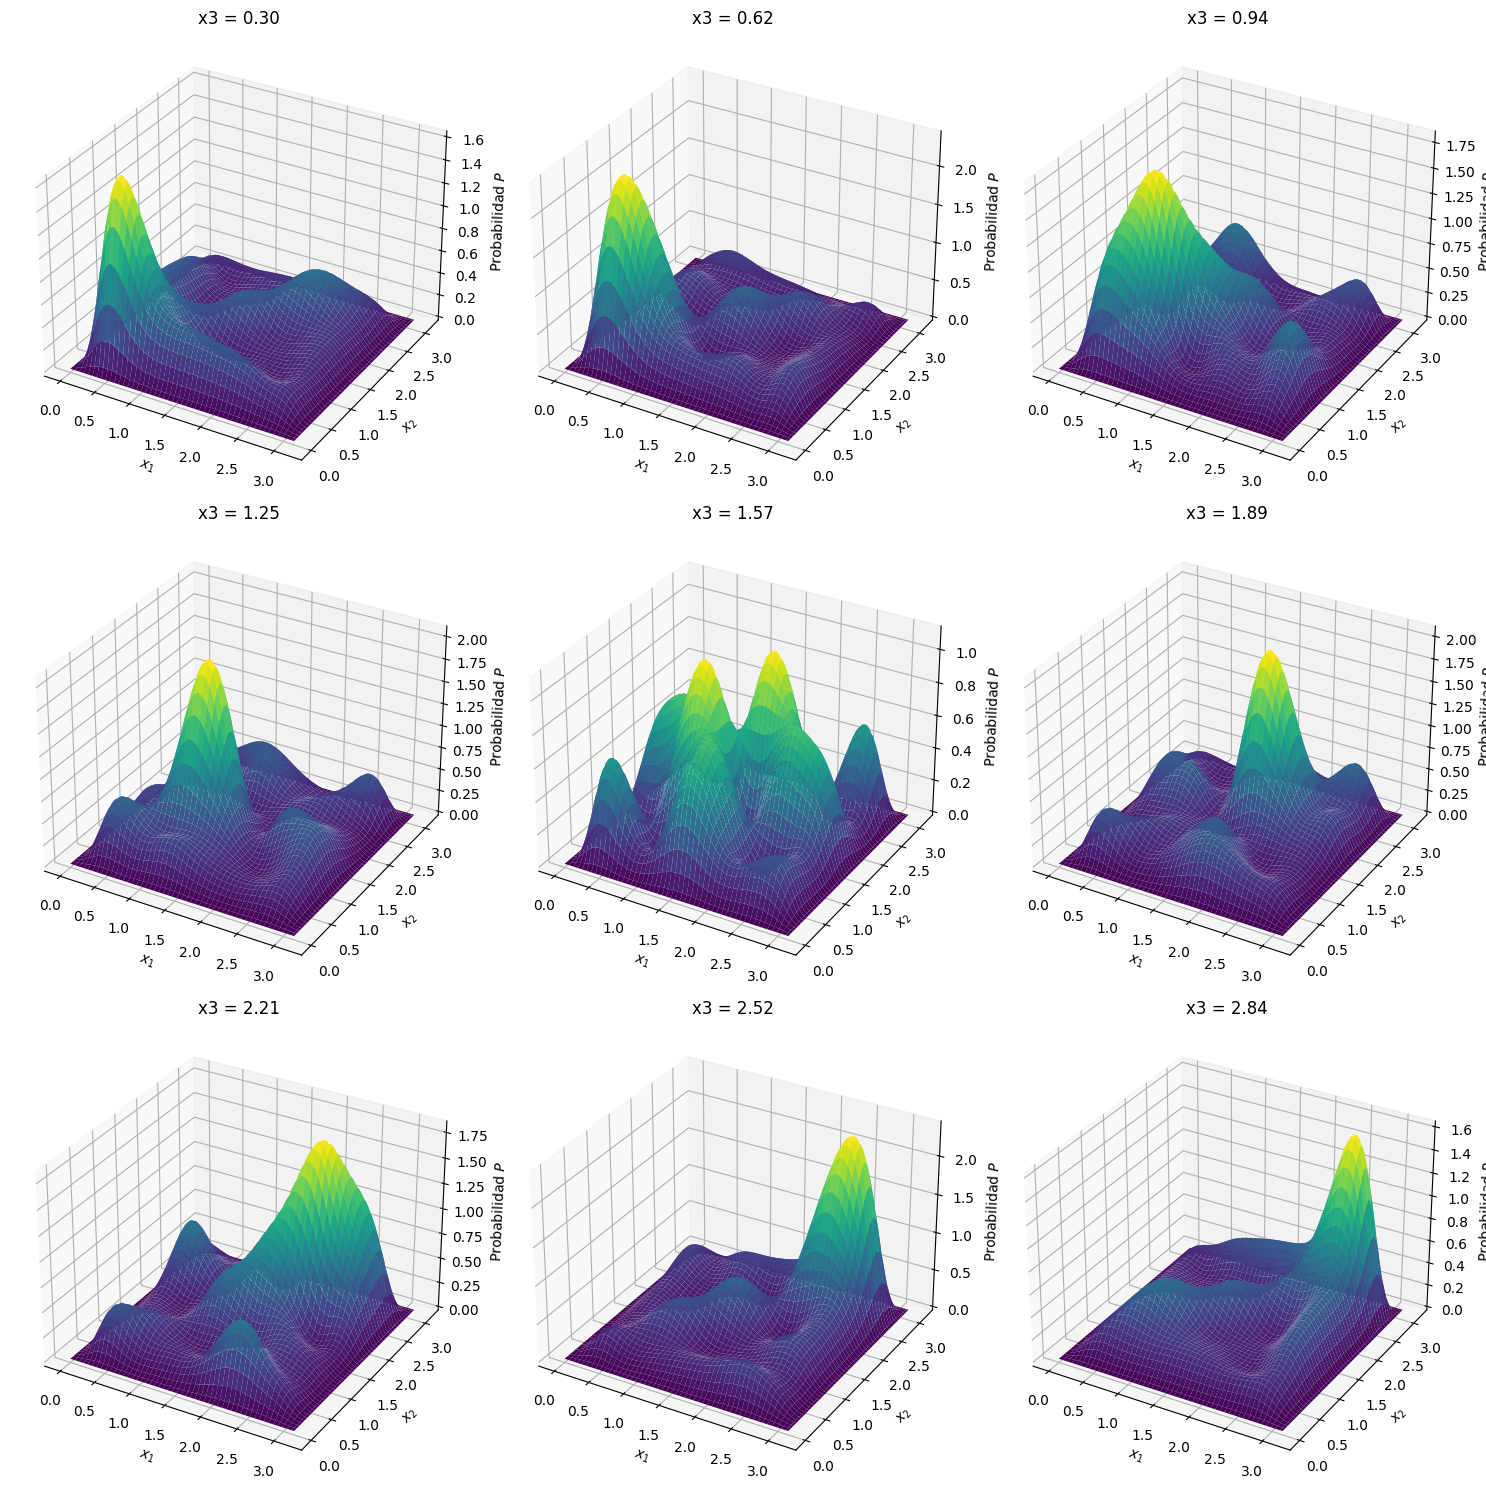

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15), subplot_kw={'projection': '3d'})

# Iteramos a través de las posiciones y de los ejes de los subplots
for ax, x3 in zip(axs.ravel(), x3_fixed):
    # Calculamos la densidad de probabilidad para la posición actual de x3
    P_bosons_three_values = Pth_bosons_optimizado(nmax, xmin, xmax, muestreo, t, x3)

    # Superficie del gráfico
    surf = ax.plot_surface(x1, x2, P_bosons_three_values, cmap='viridis', edgecolor='none')

    # Etiquetas
    ax.set_title(f'x3 = {x3:.2f}')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('Probabilidad $P$')
    ax.set_zlim(0, np.max(P_bosons_three_values))

# Ajustar el layout para evitar la superposición de los títulos
plt.tight_layout()

# Mostrar la figura
plt.show()